In [1]:
# IMPORTING LIBRARIES

In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sklearn
from sklearn import model_selection
import seaborn as sns

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [67]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


In [4]:
df=pd.read_csv('C:\\Users\\sowndariya\\Desktop\\Prasath sir\\Datasets\\iris.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
df.shape

(150, 5)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
class           0
dtype: int64

In [13]:
df.groupby('class').size()

class
setosa        50
versicolor    50
virginica     50
dtype: int64

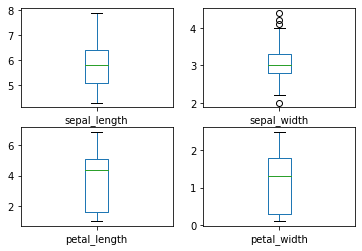

In [14]:
#box plot
df.plot(kind='box',subplots=True,layout=(2,2))
plt.show()

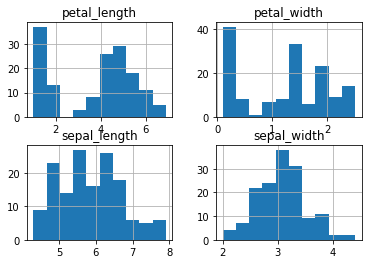

In [15]:
#histograms
df.hist()
plt.show()

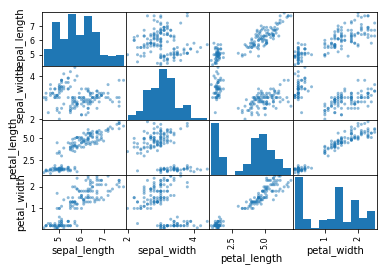

In [20]:
from pandas.plotting import scatter_matrix
scatter_matrix(df)
plt.show()

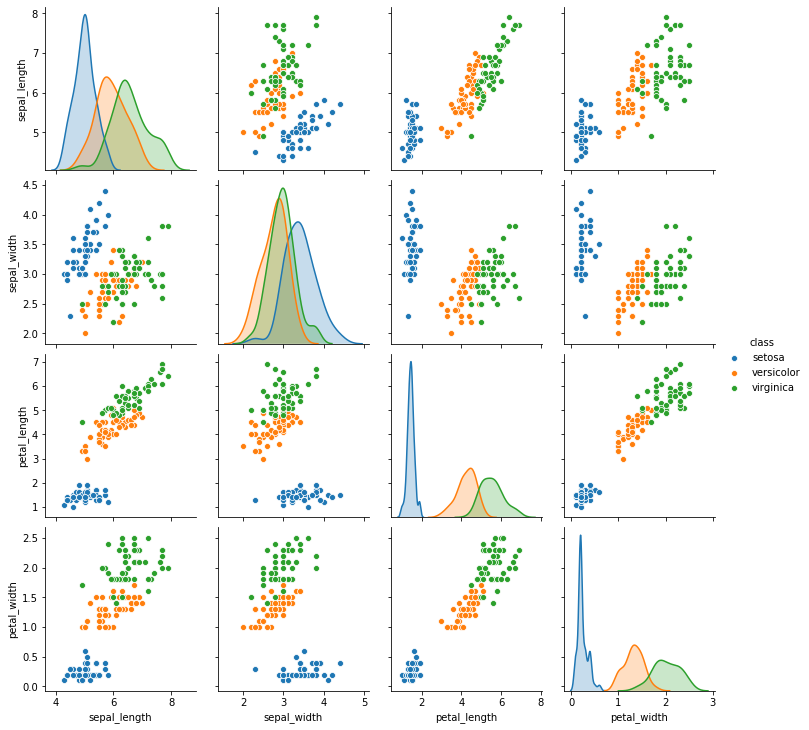

In [23]:
sns.pairplot(df,hue='class')

In [27]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [28]:
#splitting up of data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [69]:
#model
from sklearn.linear_model import LogisticRegression
log=LogisticRegression()
log.fit(x_train,y_train)

C:\Users\sowndariya\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [47]:
log.coef_,log.intercept_

(array([[-0.39438708,  0.84996932, -2.3593788 , -1.01360661],
        [ 0.41071361, -0.31817861, -0.14686835, -0.78510522],
        [-0.01632653, -0.53179071,  2.50624715,  1.79871183]]),
 array([  9.27663394,   2.30606418, -11.58269812]))

In [30]:
y_pred=log.predict(x_test)

In [45]:
tab=confusion_matrix(y_test,y_pred)
tab

array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  0,  6]], dtype=int64)

In [46]:
accuracy_score(y_test,y_pred)  #acc=(tab.diagonal().sum())/(tab.sum())

1.0

In [55]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [54]:
x11=pd.DataFrame(y_pred)
y11=pd.DataFrame(y_test)
x11.index=y11.index

comparison=pd.concat([x11,y11],axis=1,join='outer')
print(comparison)

              0       class
114   virginica   virginica
62   versicolor  versicolor
33       setosa      setosa
107   virginica   virginica
7        setosa      setosa
100   virginica   virginica
40       setosa      setosa
86   versicolor  versicolor
76   versicolor  versicolor
71   versicolor  versicolor
134   virginica   virginica
51   versicolor  versicolor
73   versicolor  versicolor
54   versicolor  versicolor
63   versicolor  versicolor
37       setosa      setosa
78   versicolor  versicolor
90   versicolor  versicolor
45       setosa      setosa
16       setosa      setosa
121   virginica   virginica
66   versicolor  versicolor
24       setosa      setosa
8        setosa      setosa
126   virginica   virginica
22       setosa      setosa
44       setosa      setosa
97   versicolor  versicolor
93   versicolor  versicolor
26       setosa      setosa


# USING MULTIPLE MODELS

In [63]:
models=[]
models.append(('LR',LogisticRegression()))
models.append(('LDA',LinearDiscriminantAnalysis()))
models.append(('KNN',KNeighborsClassifier()))
models.append(('CART',DecisionTreeClassifier()))
models.append(('NB',GaussianNB()))
models.append(('SVM',SVC()))

In [71]:
#evaluate each model
results=[]
names=[]
for name,model in models:
    kfold=model_selection.KFold(n_splits=10,random_state=7)
    cv_results=model_selection.cross_val_score(model,x_train,y_train,cv=kfold,scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print(name,cv_results.mean(),cv_results.std())
for i in zip(names,results):
    print(i)

C:\Users\sowndariya\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\sowndariya\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#lo

LR 0.95 0.055277079839256664
LDA 0.9666666666666666 0.04082482904638632
KNN 0.9333333333333333 0.062360956446232345
CART 0.9333333333333332 0.05
NB 0.9499999999999998 0.055277079839256664
SVM 0.9583333333333333 0.05590169943749474
('LR', array([0.91666667, 0.91666667, 0.83333333, 1.        , 1.        ,
       1.        , 1.        , 1.        , 0.91666667, 0.91666667]))
('LDA', array([0.91666667, 0.91666667, 0.91666667, 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 0.91666667]))
('KNN', array([0.91666667, 0.91666667, 0.83333333, 1.        , 0.91666667,
       1.        , 1.        , 1.        , 0.83333333, 0.91666667]))
('CART', array([0.91666667, 0.91666667, 0.91666667, 1.        , 1.        ,
       0.91666667, 1.        , 0.83333333, 0.91666667, 0.91666667]))
('NB', array([1.        , 0.91666667, 0.83333333, 0.91666667, 1.        ,
       1.        , 1.        , 1.        , 0.91666667, 0.91666667]))
('SVM', array([0.91666667, 1.        , 0.91666667,

In [72]:
lda=LinearDiscriminantAnalysis()
lda.fit(x_train,y_train)
y_pred=lda.predict(x_test)

In [73]:
accuracy_score(y_pred,y_test)

1.0

In [74]:
confusion_matrix(y_pred,y_test)

array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  0,  6]], dtype=int64)

In [81]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

